<a href="https://colab.research.google.com/github/UnaRam/pythonFundamemtals/blob/main/Una_15_2_Decision_Tree_coded_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding a simple decision tree
---

In this worksheet we are going to work with a data set, using the idea of a decision tree class.  We are going to simplify the model and use Python code to make a simple decision tree classification model.  We will do this for two reasons:
*   writing the code is often good for helping to understand what is going on under the bonnet of a library function
*   it is a good coding exercise for practice as it mostly depends on calculations and if..elif..else statements

In this worksheet we are going to code a decision tree which will use the calculated probabilities to make decisions about whether a row of given data would be classified as Iris-virginica, or not, based on sepal and petal dimensions.  It is easier to classify between two values (Iris-virginica or not).  Later, using this information, species would be further predicted by probabilities of error.

![Iris-petals and sepals](https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg)

The workflow is:
*  divide the data set into 70% of the rows for training and 30% for testing  (we can increase the size of the training set later)
*  find the mean for each of the 4 size columns
*  calculate the proportion of each column that are on or above mean that are of a species (ie proportion of petal-lengths on or above mean that are Iris-virginica)
*  infer the proportion of each that are not of that species (using 1 - proportion above).  In both cases we are looking to find if either of these is 1, which could be infered as definitely not that species. 
*  calculate a Gini Index that will indicate the probability that a prediction will be incorrect
*  use the results of the Gini Index to model a decision tree
*  code the decision tree model into a function that will return whether or not a row in the test set is predicted to be of species Iris-virginica
*  use the decision tree function to predict, for each row in the test set, if the species will be Iris-virginicia or not, using a set of nested if statements to classify
*  compare the predicted values against the actual values in the test set - what proportion were predicted correctly?


### Exercise 1 - investigate the iris data set
---
Let's start by looking at the data.  We are going to use a data set that contains data on iris flowers.

Read the data at this location: https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv into a dataframe called iris_data

The columns in the CSV file do not have headings, when you read the file, add column headings like this:
```
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris_data = pd.read_csv(url, name=names)
```
*  Take a look at the column info (how many columns, what type of data, any missing data?)
*  Take a look at the data values in the first 10 and the last 10 records to get an idea of the type of values included
*  Find out how many unique values there are in the species column
*  Find out the maximum, minimum, mean, median and upper and lower quartile values in each of the columns


In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris_data = pd.read_csv(url, names=names)
display(iris_data)
print(iris_data.head(10))
print(iris_data.tail(10))
print(iris_data.info())
print(iris_data.describe())
print("\n unique species and their count\n",iris_data['species'].value_counts())

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


   sepal-length  sepal-width  petal-length  petal-width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa
     sepal-length  sepal-width  petal-length  petal-width         species
140           6.7          3.1           5.6          2.4  Iris-virginica
141           6.9          3.1           5.1          2.3  Iris-virginica
142           5.8  

***after inspection of info, there are no null values in the columns***

***there are three different species, each with 50 sample rows of the 4 measurements***

### Exercise 2 - split the data into train and test sets
---

Split the data set into and 70% train, 30% test, split.  From now, just use the train data set.


In [ ]:
# import the train_test_split function
# https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py
from sklearn.model_selection import train_test_split

# create the classification variables from the all columns
train_df, test_df = train_test_split(iris_data, test_size=0.30) #between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split.
print("Train\n",train_df.describe())
print(train_df.info())
print(test_df.describe())
print(test_df.info())

Train
        sepal-length  sepal-width  petal-length  petal-width
count    105.000000   105.000000    105.000000   105.000000
mean       5.915238     3.056190      3.898095     1.257143
std        0.812851     0.430323      1.734768     0.750879
min        4.400000     2.200000      1.200000     0.100000
25%        5.200000     2.800000      1.600000     0.400000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.500000     3.300000      5.200000     1.800000
max        7.700000     4.400000      6.900000     2.500000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 124 to 114
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  105 non-null    float64
 1   sepal-width   105 non-null    float64
 2   petal-length  105 non-null    float64
 3   petal-width   105 non-null    float64
 4   species       105 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.

 
***There are no nulls in these columns so don't need to dropna***

***train df has 105 entries and test df has 45 so split nto 70:30***



### Exercise 3 - assumptions and classification
---

Let's make some assumptions based on the data

1.  Iris-setosa, Iris-versicolor, Iris-virginica are the full range of types of iris to be analysed
2.  Although this is a small data set, the means are fairly representative

With these in mind, let's start by classifying sepal/petal size into long/short and wide/narrow with values on or above the mean taken as long or wide and those below as short or narrow.

This is a starting point.  We will be trying to find a value (indicator) for each column where rows on or above do not contain any of a particular species, this might indicate that this column is a good (if not rough) indicator of species.  For now, the indicator is the mean.

*  Drop any null values from each column

Calculate, and store the means of the four columns

*  **Test**:
Display train.describe() to see the value of the means of the training set. Print the four means and compare to the output of train.describe() to check that they have been calculated correctly.

*  Create a new dataframe with the numeric columns encoded so show a 1 for any value that is above the mean for its column and 0 for any that isn't.




In [ ]:
#change from mean to median - leave all variable names the same

def find_df_indicator(df,col,measure):
  if (measure == 'mean'):
    indicator = df[col].mean() # better to just extract from df.info()????   
  elif (measure == 'median'):
    indicator = df[col].median()
  elif (measure == 'uppquant'):
    indicator = df[col].quantile(0.75)
  elif (measure == 'lowquant'):
    indicator = df[col].quantile(0.25)
  else:
    #default to max
     indicator = df[col].max()
  return indicator


def calc_indicators(df, meas_type):
  # 'sepal-length', 'sepal-width', 'petal-length', 'petal-width',
  isl = round(find_df_indicator(df,'sepal-length',meas_type),3)
  isw = round(find_df_indicator(df,'sepal-width',meas_type),3)
  ipl = round(find_df_indicator(df,'petal-length',meas_type),3)
  ipw = round(find_df_indicator(df,'petal-width',meas_type),3)
  return isl,isw, ipl, ipw

indicator_sepal_length, indicator_sepal_width, indicator_petal_length, indicator_petal_width = calc_indicators(train_df,'mean')
print(indicator_sepal_length, indicator_sepal_width, indicator_petal_length, indicator_petal_width)
#test - compare with describe output for this df
print("Train\n",train_df.describe())


5.915 3.056 3.898 1.257
Train
        sepal-length  sepal-width  petal-length  petal-width
count    105.000000   105.000000    105.000000   105.000000
mean       5.915238     3.056190      3.898095     1.257143
std        0.812851     0.430323      1.734768     0.750879
min        4.400000     2.200000      1.200000     0.100000
25%        5.200000     2.800000      1.600000     0.400000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.500000     3.300000      5.200000     1.800000
max        7.700000     4.400000      6.900000     2.500000


***calculated means and means from describe are the same to 4 dp***


In [ ]:
# get the mean for each column and apply a function to encode into 1 (above or equal to  mean) and 0 (below mean)
def encode(df, **kwds):
  target = kwds['indicator']
  col_name = kwds['col']
  if df[col_name] >=target:
    return 1
  else:
    return 0


# run the function for each column so that each of the four columns are encoded, then drop the original columns, saving as a new dataframe
train_df['sepal-length_encoded'] = train_df.apply(encode, axis=1, col='sepal-length', indicator=indicator_sepal_length)
train_df['sepal-width_encoded'] = train_df.apply(encode, axis=1, col='sepal-width', indicator=indicator_sepal_width)
train_df['petal-length_encoded'] = train_df.apply(encode, axis=1, col='petal-length', indicator=indicator_petal_length)
train_df['petal-width_encoded'] = train_df.apply(encode, axis=1, col='petal-width', indicator=indicator_petal_width)

train_enc_df = train_df.drop(columns = ['sepal-length','sepal-width','petal-length','petal-width'])

display(train_enc_df)


,species,sepal-length_encoded,sepal-width_encoded,petal-length_encoded,petal-width_encoded
124,Iris-virginica,1,1,1,1
43,Iris-setosa,0,1,0,0
6,Iris-setosa,0,1,0,0
66,Iris-versicolor,0,0,1,1
148,Iris-virginica,1,1,1,1
...,...,...,...,...,...
48,Iris-setosa,0,1,0,0
70,Iris-versicolor,0,1,1,1
15,Iris-setosa,0,1,0,0
19,Iris-setosa,0,1,0,0


### Exercise 4 - Calculate the proportion of values on or above the mean that are of each species

We are going to focus on the `Iris-virginica` species first.

First we will calculate, for each dimension column (`sepal-length, sepal-width, petal-length, petal-width`) what proportion of values in that column, where the value is on or above the mean, are classified as `Iris-virginica`.

We will do this by filtering all the records in each column of the the `train` set that are on or above the mean and match the species .  Then use the outcome to calculate the proportion of the full `train` set for which a value on or above the mean that are of species `Iris-virginica`.

*  filter for values in the `sepal-length` column being on or above the mean and the species column being `Iris-virginica`.  Then divide the count of rows in this filtered dataset by the count of rows in a second data set, filtered for just the value being on or above the mean.

*  Do this for all four columns, for `Iris-virginica`  (4 operations).

Print the results to see which columns look like they might most reliably predict the species as `Iris-virginica` (the result is as close as possible to 1).  The highest numbers may indicate the most reliable indicators, but we will do some more before coming to this conclusion.

*  By definition, those on or above the mean that are NOT Iris_virginica will be `1 - the proportion of those that are.  Calculate these

The first one has been done for you.

*  We will also need the proportion of those BELOW the mean that are NOT Iris-virginica.  Calculate these in the same way



In [ ]:
# calculate the proportion of results where the value is on or above mean that are of the species Iris-virginica

pd.set_option('display.max_columns', None)

def calc_proportion_above(df,species,column):
  # filtering all the records in each column of the the train set that are on or above the mean and match the species
  filter_both=(df['species']==species) & (df[column]==1)
  filtered_both_df = df[filter_both]
  # (above_mean + this species)/above_mean
  count_both = filtered_both_df[column].sum()
  filter_mean=(df[column]==1) #if set to 1, this value was above mean
  filtered_mean_df = df[filter_mean]
  count_above_mean = filtered_mean_df[column].sum()
  return round((count_both/count_above_mean),3)

def calc_ratios_above_species(spec):
  # print("\n\ncalculating proportion above mean which are  ",spec)
  ratio_sepal_length = calc_proportion_above(train_enc_df,spec,'sepal-length_encoded')
  ratio_sepal_width = calc_proportion_above(train_enc_df,spec,'sepal-width_encoded')
  ratio_petal_length = calc_proportion_above(train_enc_df,spec,'petal-length_encoded')
  ratio_petal_width = calc_proportion_above(train_enc_df,spec,'petal-width_encoded')
  return ratio_sepal_length, ratio_sepal_width, ratio_petal_length, ratio_petal_width


ratio_sl, ratio_sw, ratio_pl, ratio_pw = calc_ratios_above_species('Iris-virginica')
print("sepal length\tsepal width\tpetal length\tpetal width")
print(ratio_sl,"\t\t",ratio_sw,"\t\t", ratio_pl, "\t\t",ratio_pw)

#By definition, those on or above the mean that are NOT Iris_virginica will be `1 - the proportion of those that are. Calculate these
# def calc_ratio_above_mean_not_species():

#   return
ratio_sl_not = 1 - ratio_sl
ratio_sw_not = 1 - ratio_sw
ratio_pl_not = 1 - ratio_pl
ratio_pw_not = 1 - ratio_pw

print("\nratio of those above mean which are NOT this species")
print("sepal length\tsepal width\tpetal length\tpetal width")
print(ratio_sl_not,"\t\t",ratio_sw_not,"\t\t", ratio_pl_not, "\t\t",ratio_pw_not)


sepal length	sepal width	petal length	petal width
0.673 		 0.292 		 0.522 		 0.574

ratio of those above mean which are NOT this species
sepal length	sepal width	petal length	petal width
0.32699999999999996 		 0.708 		 0.478 		 0.42600000000000005


We will also need the proportion of those BELOW the mean that are NOT Iris-virginica. 

In [ ]:
def calc_proportion_below_not(df,species,column):
  # print(df)
  filter_both=(df['species']!=species) & (df[column]==0)
  filtered_both_df = df[filter_both]
  # display(filtered_both_df)
  # print(filtered_both_df.describe())
  count_both = filtered_both_df[column].count()
  filter_mean=(df[column]==0)
  filtered_mean_df = df[filter_mean]
  # display(filtered_mean_df)
  count_mean = filtered_mean_df[column].count()
  # print("count both\t", count_both,"count_mean\t",count_mean)
  return round((count_both/count_mean),3)

def calc_ratios_below_species_not(spec):
  # print("calculating proportion below mean which are not  ",spec)
  ratio_sepal_length = calc_proportion_below_not(train_enc_df,spec,'sepal-length_encoded')
  ratio_sepal_width = calc_proportion_below_not(train_enc_df,spec,'sepal-width_encoded')
  ratio_petal_length = calc_proportion_below_not(train_enc_df,spec,'petal-length_encoded')
  ratio_petal_width = calc_proportion_below_not(train_enc_df,spec,'petal-width_encoded')
  return ratio_sepal_length, ratio_sepal_width, ratio_petal_length, ratio_petal_width


ratio_sl_b, ratio_sw_b, ratio_pl_b, ratio_pw_b = calc_ratios_below_species_not('Iris-virginica')
print("sepal length\tsepal width\tpetal length\tpetal width")
print(ratio_sl_b,"\t\t",ratio_sw_b,"\t\t", ratio_pl_b, "\t\t",ratio_pw_b)

sepal length	sepal width	petal length	petal width
0.964 		 0.632 		 1.0 		 1.0


### Exercise 5 - Calculate the proportion of each column, where the value is below mean, that are of species `Iris-virginica`

Repeat the code above, this time looking for values below the mean

In [ ]:
# calculate the proportion of results where the value is below mean that are of the species Iris-virginica

def calc_proportion_below_are(df,species,column):
  # print(df)
  filter_both=(df['species']==species) & (df[column]==0)
  filtered_both_df = df[filter_both]
  # display(filtered_both_df)
  # print(filtered_both_df.describe())
  count_both = filtered_both_df[column].count()
  filter_mean=(df[column]==0)
  filtered_mean_df = df[filter_mean]
  # display(filtered_mean_df)
  count_mean = filtered_mean_df[column].count()
  # print("count both\t", count_both,"count_mean\t",count_mean)
  return round((count_both/count_mean),3)

def calc_ratios_below_species_are(spec):
  # print("calculating proportion below mean which  are ",spec)
  ratio_sepal_length = calc_proportion_below_are(train_enc_df,spec,'sepal-length_encoded')
  ratio_sepal_width = calc_proportion_below_are(train_enc_df,spec,'sepal-width_encoded')
  ratio_petal_length = calc_proportion_below_are(train_enc_df,spec,'petal-length_encoded')
  ratio_petal_width = calc_proportion_below_are(train_enc_df,spec,'petal-width_encoded')
  return ratio_sepal_length, ratio_sepal_width, ratio_petal_length, ratio_petal_width


ratio_sl_b_a, ratio_sw_b_a, ratio_pl_b_a, ratio_pw_b_a = calc_ratios_below_species_are('Iris-virginica')
print("sepal length\tsepal width\tpetal length\tpetal width")
print(ratio_sl_b_a,"\t\t",ratio_sw_b_a,"\t\t", ratio_pl_b_a, "\t\t",ratio_pw_b_a)

sepal length	sepal width	petal length	petal width
0.036 		 0.368 		 0.0 		 0.0


### Exercise 5 - calculate for the other two Iris species
---

Do the same calculations for the Iris-versicolor species, then for the Iris-setosa species.






In [ ]:
def calculate_porpotions_per_species(species_name):
    ratio_sl, ratio_sw, ratio_pl, ratio_pw = calc_ratios_above_species(species_name)
    print(ratio_sl,"\t\t",ratio_sw,"\t\t", ratio_pl, "\t\t",ratio_pw)
    list_above_are = (ratio_sl,ratio_sw, ratio_pl,ratio_pw)
    # print(list_above_are)
    #move this into the cal_ratios_above_species_func?
    ratio_sl_n = 1 - ratio_sl
    ratio_sw_n = 1 - ratio_sw
    ratio_pl_n = 1 - ratio_pl
    ratio_pw_n = 1 - ratio_pw
    # print("calculating proportion above mean which are NOT ",species_name)
    # print(ratio_sl_n,"\t\t",ratio_sw_n,"\t\t", ratio_pl_n, "\t\t",ratio_pw_n)
    list_above_not = (ratio_sl_n,ratio_sw_n, ratio_pl_n,ratio_pw_n)
    ratio_sl_b, ratio_sw_b, ratio_pl_b, ratio_pw_b = calc_ratios_below_species_not(species_name)
    # print("sepal length\tsepal width\tpetal length\tpetal width")
    # print(ratio_sl_b,"\t\t",ratio_sw_b,"\t\t", ratio_pl_b, "\t\t",ratio_pw_b)
    list_below_not=(ratio_sl_b,ratio_sw_b,ratio_pl_b, ratio_pw_b)
    ratio_sl_b_a, ratio_sw_b_a, ratio_pl_b_a, ratio_pw_b_a = calc_ratios_below_species_are(species_name)
    # print("sepal length\tsepal width\tpetal length\tpetal width")
    # print(ratio_sl_b_a,"\t\t",ratio_sw_b_a,"\t\t", ratio_pl_b_a, "\t\t",ratio_pw_b_a)
    list_below_are = (ratio_sl_b_a,ratio_sw_b_a, ratio_pl_b_a,ratio_pw_b_a)
    dict_per_species = {'species':species_name,'above_mean':list_above_are,'below_mean':list_below_are}
#    print(dict_per_species)
    return dict_per_species

dict1=calculate_porpotions_per_species("Iris-virginica")
dict2=calculate_porpotions_per_species("Iris-versicolor")
dict3=calculate_porpotions_per_species("Iris-setosa")

list_species_results = (dict1,dict2,dict3)
print(list_species_results)

0.673 		 0.292 		 0.522 		 0.574
0.327 		 0.104 		 0.478 		 0.426
0.0 		 0.604 		 0.0 		 0.0
({'species': 'Iris-virginica', 'above_mean': (0.673, 0.292, 0.522, 0.574), 'below_mean': (0.036, 0.368, 0.0, 0.0)}, {'species': 'Iris-versicolor', 'above_mean': (0.327, 0.104, 0.478, 0.426), 'below_mean': (0.411, 0.596, 0.184, 0.295)}, {'species': 'Iris-setosa', 'above_mean': (0.0, 0.604, 0.0, 0.0), 'below_mean': (0.554, 0.035, 0.816, 0.705)})


### Exercise 6 - predict from the results
---

Create a list of dictionaries from the results Exercise 4 and 5 (e.g. {'species':..., 'above_mean': 0.xx, 'below_mean': 0.xx}  

Then use a loop to go through the list and print:  
*  any species and indicator (above or below mean) that can reliably be predicted.  A reliable prediction may be one over 0.5

In [ ]:
# create a list of dictionaries

# do this inside the calculate and return the dicts to a list - see part 5


In [ ]:
# show which columns are reliable predictors

#list of measurements
list_measure = ('sepal_length','sepal_width','petal_length','petal_width')

for spec_dict in list_species_results:
  # print(spec_dict)
  for key,value in spec_dict.items():
    print(key,value)


species Iris-virginica
above_mean (0.673, 0.292, 0.522, 0.574)
below_mean (0.036, 0.368, 0.0, 0.0)
species Iris-versicolor
above_mean (0.327, 0.104, 0.478, 0.426)
below_mean (0.411, 0.596, 0.184, 0.295)
species Iris-setosa
above_mean (0.0, 0.604, 0.0, 0.0)
below_mean (0.554, 0.035, 0.816, 0.705)


### Exercise 6 - Make a decision tree
---

Use pencil and paper or a graphical application to create a decision tree for Iris-virginica, using the following rules (use the picture below as a guide):

*  The column with the highest indicator is placed at the top
*  Other columns are placed in order below
*  The rest of the columns are placed in order below these

Any column where one branch (on or above mean OR below mean) has an indicator of 0, could be classified as a strong indicator of Iris_virginica being the species.  Anything else, unless there is something very close to 0, could be classified as a weak indicator of Iris_virginica being the species.

Let's code the decision tree using the following logic for this decision tree (yours might be slightly different):

![Decision tree](https://drive.google.com/uc?id=1CTo23EHwR2IPCRjcfSyCQsT_oQ5Exwso)

In the decision tree above, there is no certainty below petal-length so our decision tree will only include petal-width and petal-length.




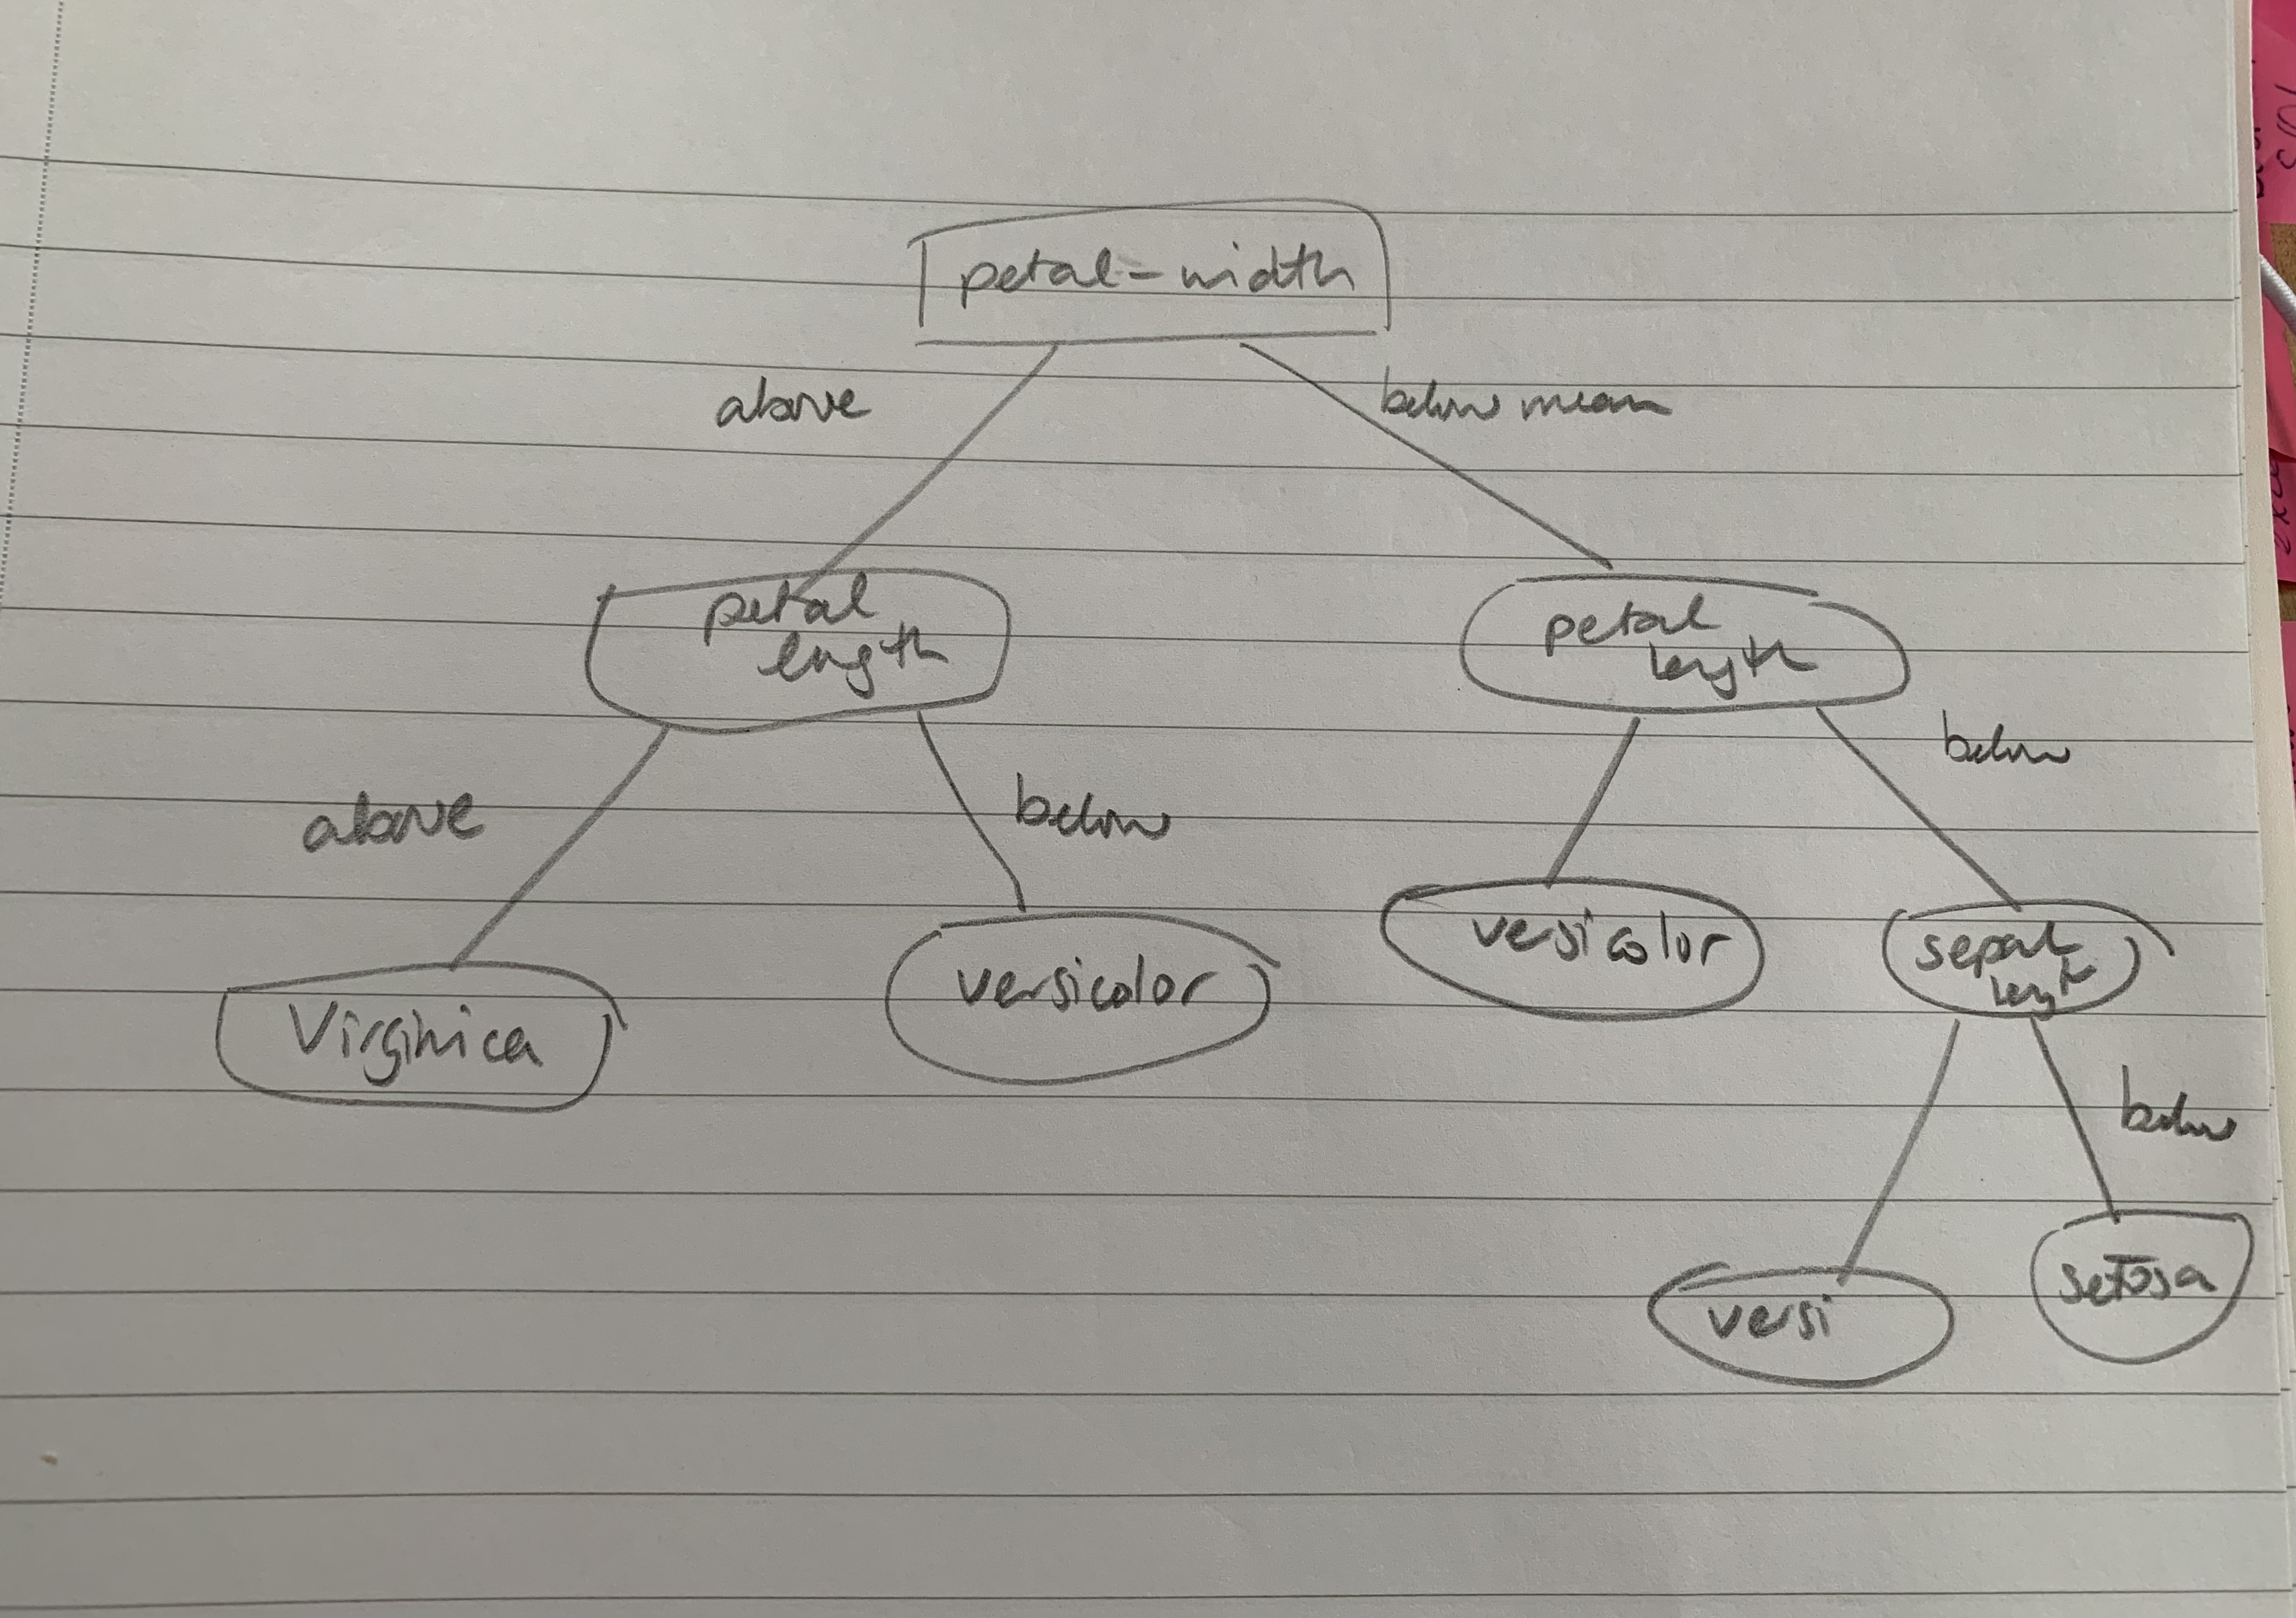

In [ ]:
# display(test_df)
# run the function for each column so that each of the four columns are encoded, then drop the original columns, saving as a new dataframe
test_df['sepal-length_encoded'] = test_df.apply(encode, axis=1, col='sepal-length', indicator=indicator_sepal_length)
test_df['sepal-width_encoded'] = test_df.apply(encode, axis=1, col='sepal-width', indicator=indicator_sepal_width)
test_df['petal-length_encoded'] = test_df.apply(encode, axis=1, col='petal-length', indicator=indicator_petal_length)
test_df['petal-width_encoded'] = test_df.apply(encode, axis=1, col='petal-width', indicator=indicator_petal_width)

test_enc_df = test_df.drop(columns = ['sepal-length','sepal-width','petal-length','petal-width'])



In [ ]:
# display(test_enc_df)

In [ ]:
def get_species(df):
  # ADD CODE HERE TO RETURN None if petal-width is below mean (encoded as 0) or if petal-length is below mean (encoded as 0), otherwise return 'Iris-virginia'
  # need to have encoded the test_df test_enc_df


#first model
  if df['petal-width_encoded']==0:
    # NOT virginica
    #maybe setosa or versicolor
    if df['petal-length_encoded']==0:
      #NOT virginica
      #maybe setosa or versicolor
      if df['sepal-length_encoded']==0:
        return 'Iris-setosa'
      else:
        return 'Iris-versicolor'
    else:
      if df['sepal-width_encoded']==0:
        return 'Iris-versicolor'
  else:
    if df['petal-length_encoded']==0:
      return 'Iris-virginica'
    else:
      return 'Iris-versicolor'

#second model
  # if df['petal-width_encoded']==0 or df['petal-length_encoded']==0:
  #   #not virginica
  #   if df['sepal-length_encoded']==0  and df['petal-width_encoded']==0 and df['petal-length_encoded']==0:
  #     return 'Iris-setosa'
  #   elif df['sepal-width_encoded']==1 and df['petal-length_encoded']==1 and df['petal-width_encoded']==1 and df['sepal-length_encoded']==0:
  #     return 'Iris-versicolor'
  # elif df['sepal-length_encoded']==1 and df['petal-width_encoded']==1 and df['petal-length_encoded']==1:
  #   return 'Iris-virginica'
  # else:
  #   return None


# use the get_species(df) function to predict the species, count how many are predicted correct and use this to calculate the proportion correct
correct = 0
test_size = test_enc_df.shape[0]
# print(test_size)
for i in range(0, test_size):
  species = get_species(test_enc_df.iloc[i])
  # print(i, species,test_enc_df.iloc[i]['species'])
  if species == test_enc_df.iloc[i]['species']:
      correct += 1

print ("Proportion correctly identified", round((correct / test_size),3) )


Proportion correctly identified 0.644


***Iris-virginica when using mean:***
***Proportion correctly identified 0.378***
***Proportion correctly identified 0.444***
***Proportion correctly identified 0.333***
***Proportion correctly identified 0.311***

***over multiple runs, get different results as the train/test split is different each time***

### Exercise 7 - change the measure

We are currently using the mean to act as the decision making line.  We can use the decision tree with a different line.

Change the mean values so that you are instead using the median instead for all four columns.  The code should not need changing except for where you calculated the mean.

Run all the code again.  Is the proportion of correct values better this time?   Is the decision tree still appropriate?


In [ ]:
# display(test_df)

What do you notice? (write your answer here)

***for iris virginica, using the mean or the median doesn't make a difference***

***this is a bit suspicious***

***however looking at the test df filtered for just iris virginica***

***pl is between  4.9 to 6.6***

***pw is betwen 1.4 to 2.5***



***median 4.2 1.3***

***mean 3.6 1.124***

***so these make sense***

### Exercise 8 - try different measures
---

Do the same again but with upper quantile, then again with the lower quantile.  Is it making any difference?  Which give the best looking results?


***upper quantile***
***Proportion correctly identified 0.289***

***lowerquantile***
***Proportion correctly identified 0.311***
***Proportion correctly identified 0.467***
***Proportion correctly identified 0.267***

### Exercise 9 - try a different species

Run the mean test again for the Iris-versicolor species.  Again, try some different decision making lines.

What are the results.  Record them in the text cell below:

Write your answers here:  

***Iris-setosa has three inidcators so test for that first***

***sl=pl=pw=0 and sw=1***

***used the display df feature to look at the test and guessed a decision tree based on that***
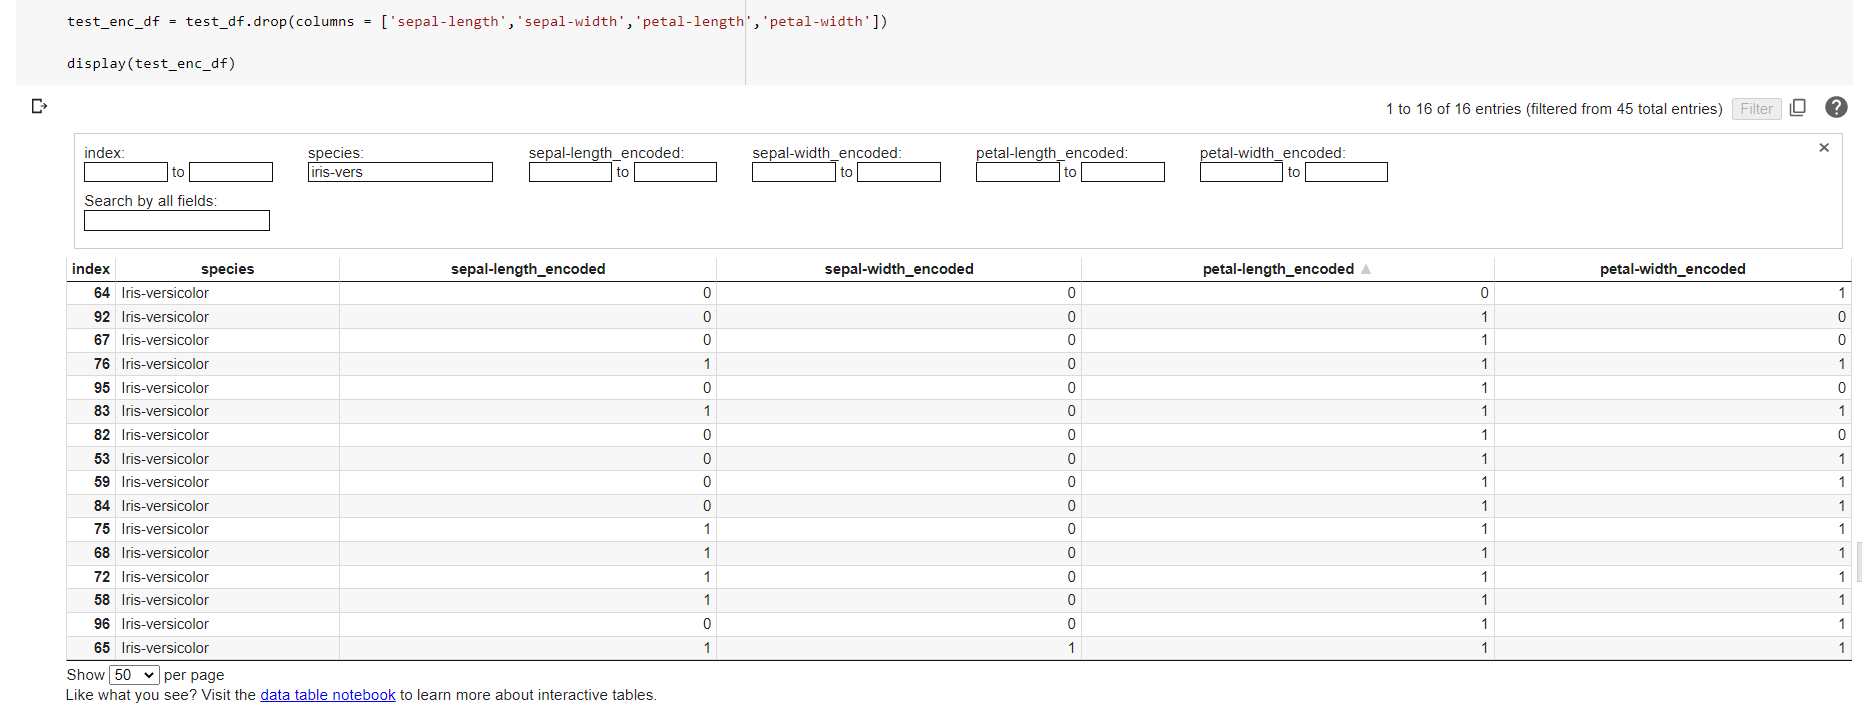

using this model


```
  if df['petal-width_encoded']==0:
    # NOT virginica
    #maybe setosa or versicolor
    if df['petal-length_encoded']==0:
      #NOT virginica
      #maybe setosa or versicolor
      if df['sepal-length_encoded']==0:
        return 'Iris-setosa'
      else:
        return 'Iris-versicolor'
    else:
      if df['sepal-width_encoded']==0:
        return 'Iris-versicolor'
  else:
    if df['petal-length_encoded']==0:
      return 'Iris-virginica'
    else:
      return 'Iris-versicolor'
```
***get   0.689, 0.578,0.711,0.756,0.556***


using this model 


```
  if df['petal-width_encoded']==0 or df['petal-length_encoded']==0:
    #not virginica
    if df['sepal-length_encoded']==0  and df['petal-width_encoded']==0 and df['petal-length_encoded']==0:
      return 'Iris-setosa'
    elif df['sepal-width_encoded']==1 and df['petal-length_encoded']==1 and df['petal-width_encoded']==1 and df['sepal-length_encoded']==0:
      return 'Iris-versicolor'
  elif df['sepal-length_encoded']==1 and df['petal-width_encoded']==1 and df['petal-length_encoded']==1:
    return 'Iris-virginica'
  else:
    return None
```
***get 0.644,0.533,0.689, 0.600, 0.622***
***so choose first model***


# New logic introduced in this worksheet:

1.  Adding headings to a CSV if none currently exist
2.  Splitting a data set into train and test sets
3. using a decision tree

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


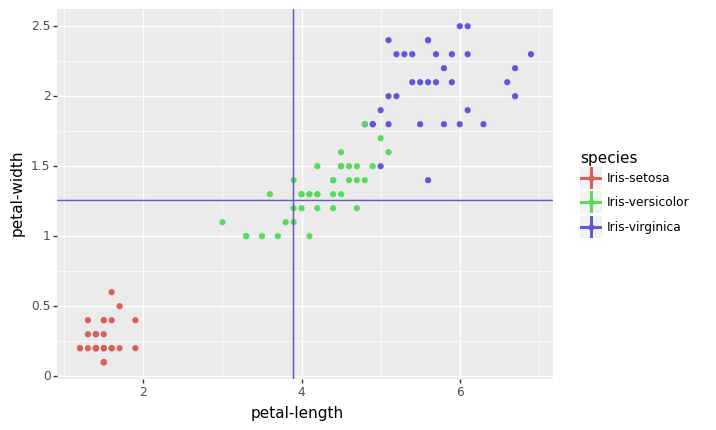

<ggplot: (8774209836929)>

In [ ]:
## this type of plot will show the distribution on a chart
from plotnine import *
ggplot(train_df, aes(x='petal-length', y='petal-width', color='species')) + geom_point() + geom_vline(train_df, aes(xintercept=train_df['petal-length'].mean(), color='species')) + geom_hline(train_df, aes(yintercept=train_df['petal-width'].mean(), color='species'))

Reflections

This was an interesting project and a first attempt at decision trees
I found it easier to walk through the decision tree using the display(df) function as I could then see how  the various filters (encoded value == 0) etc affected the correct identification of the irises
It would be good to spend more time on this